# Churn modeling dataset from kaggle.com

## About Dataset:
### Context

The dataset is the details of the customers in a company.

### Content

The column are about it's estimated salary, age, sex, etc. Aiming to provide all details about an employee.

### URL

https://www.kaggle.com/shubh0799/churn-modelling

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cols = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary',
'Exited']
df_churn = pd.read_csv('Churn_Modelling.csv', usecols=cols)
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [3]:
# Проверка размеров датасета
df_churn.shape

(10000, 10)

In [4]:
# Проверка на наличие пропущенных значений
df_churn.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Подсчет количества клиентов по странам
df_churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<BarContainer object of 3 artists>

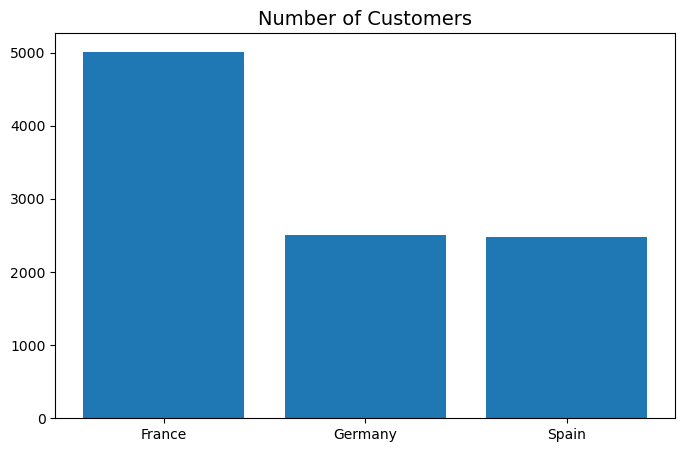

In [6]:
# Количество клиентов в каждой стране
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x= df_churn['Geography'].value_counts().index,
        height=df_churn.Geography.value_counts().values)

([<matplotlib.axis.YTick at 0x124a70100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

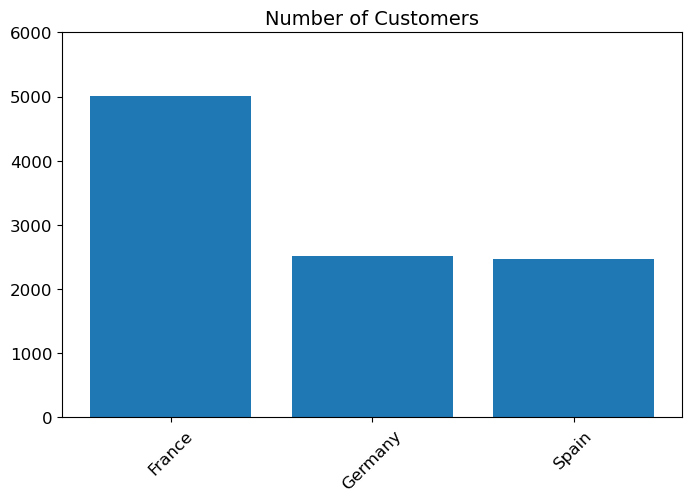

In [7]:
# Редактируем оси
plt.figure(figsize=(8,5))
plt.xticks(fontsize=12, rotation=45)
plt.title("Number of Customers", fontsize=14)
plt.bar(x= df_churn['Geography'].value_counts().index,
        height=df_churn.Geography.value_counts().values)
plt.yticks(ticks=np.arange(0, 7000, 1000), fontsize=12)


(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

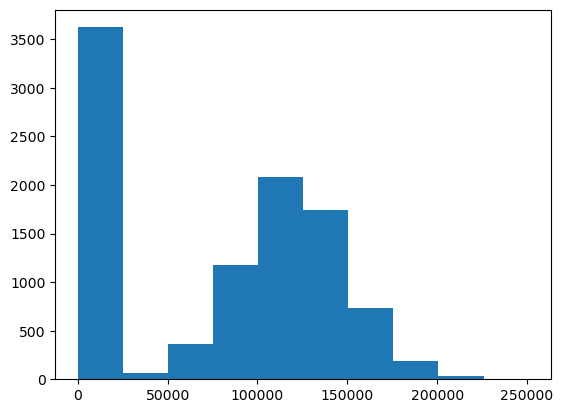

In [8]:
# Гистограмма балансов счетов
plt.hist(x=df_churn['Balance'])

Text(0.5, 1.0, 'Distribution on Balance (25000 - 225000)')

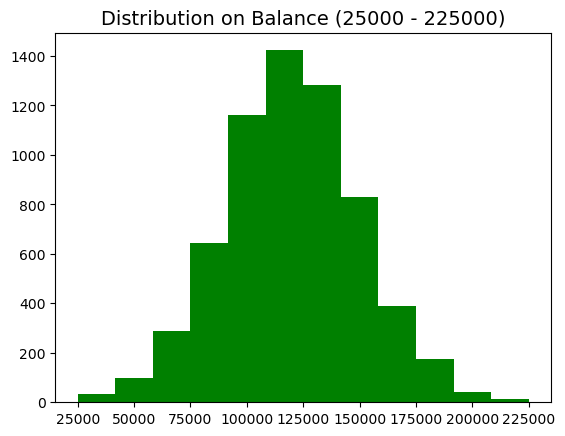

In [9]:
# Гистограмма балансов счетов c без учета выбросов в диапазоне сумм от 25k до 225k

plt.hist(x=df_churn['Balance'], bins=12, color='g',
         range=(25000, 225000))
plt.title("Distribution on Balance (25000 - 225000)", fontsize=14)

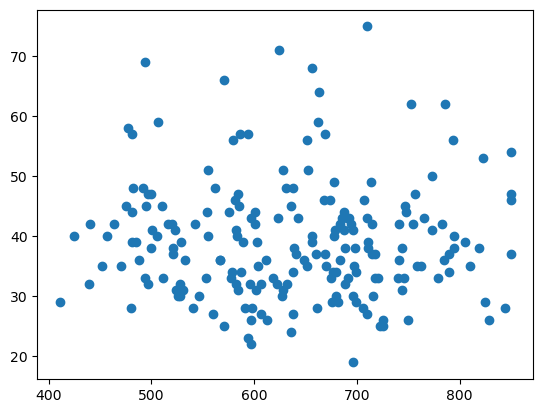

In [10]:
# Точечный график зависимости возраста клиента и его кредитного рейтинга 
sample = df_churn.sample(n=200, random_state=42) # подмножество исходного датасета с выборкой 200 произвольных случаев
plt.scatter(x=sample['CreditScore'], y=sample['Age'])

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

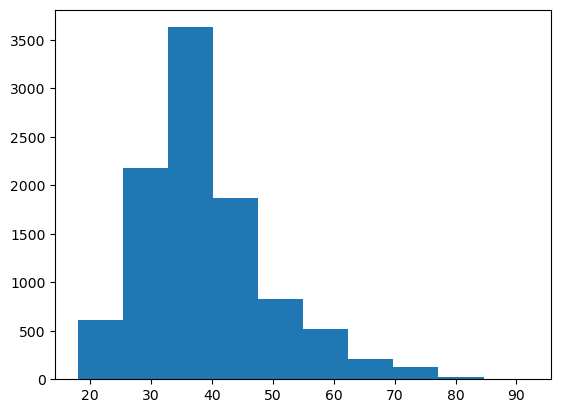

In [11]:
# Гистограмма балансов счетов по возрастным группам
plt.hist(x=df_churn['Age'])

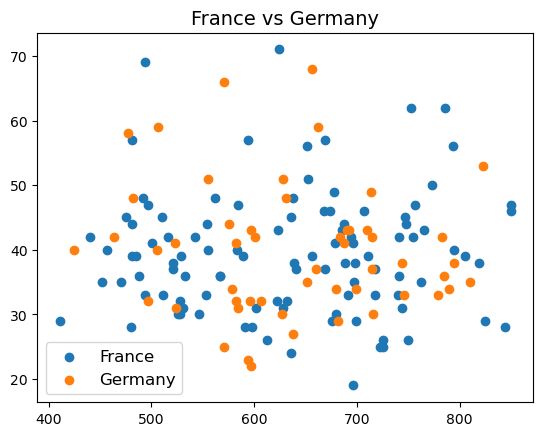

In [12]:
# Несколько графиков на одном рисунке
fig, ax = plt.subplots()

plt.title("France vs Germany", fontsize=14)
ax.scatter(x=sample[sample.Geography == 'France']['CreditScore'], y=sample[sample.Geography == 'France']['Age'])
ax.scatter(x=sample[sample.Geography == 'Germany']['CreditScore'], y=sample[sample.Geography == 'Germany']['Age'])
ax.legend(labels=['France','Germany'], loc='lower left', fontsize=12)


Text(0.5, 1.0, 'Number of Products')

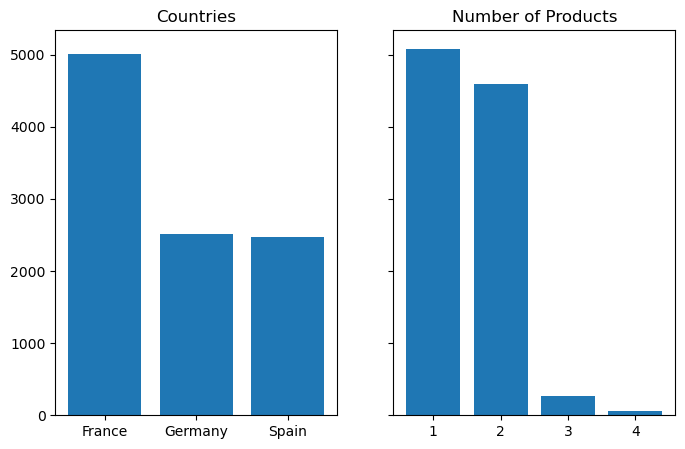

In [13]:
# Несколько графиков на одном рисунке

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True,
figsize=(8,5))
countries = df_churn.Geography.value_counts()
products = df_churn.NumOfProducts.value_counts()
ax1.bar(x=countries.index, height=countries.values)
ax1.set_title("Countries", fontsize=12)
ax2.bar(x=products.index, height=products.values)
ax2.set_title("Number of Products", fontsize=12)